<a href="https://colab.research.google.com/github/ronil1508/SOC-2022_QML/blob/main/Bernstein_Vazirani_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex, plot_bloch_multivector
from math import sqrt, pi
from IPython.display import display, Math
from qiskit.quantum_info import random_statevector

In [15]:
n = 5
secret = "11101"

In [16]:
qc = QuantumCircuit(n + 1, n)
for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()    
qc.draw(initial_state='True')

┌───┐      ░ 
q_0: |0>┤ H ├──────░─
        ├───┤      ░ 
q_1: |0>┤ H ├──────░─
        ├───┤      ░ 
q_2: |0>┤ H ├──────░─
        ├───┤      ░ 
q_3: |0>┤ H ├──────░─
        ├───┤      ░ 
q_4: |0>┤ H ├──────░─
        ├───┤┌───┐ ░ 
q_5: |0>┤ X ├┤ H ├─░─
        └───┘└───┘ ░ 
 c: 0 5/═════════════

In [17]:
secret = secret[::-1] # reverse secret to fit qiskit's qubit ordering
for q in range(n):
    if secret[q] == '0':
        qc.i(q)
    else:
        qc.cx(q, n)
qc.barrier()
qc.draw()        

┌───┐      ░                      ░ 
q_0: ┤ H ├──────░───■──────────────────░─
     ├───┤      ░   │  ┌───┐           ░ 
q_1: ┤ H ├──────░───┼──┤ I ├───────────░─
     ├───┤      ░   │  └───┘           ░ 
q_2: ┤ H ├──────░───┼────■─────────────░─
     ├───┤      ░   │    │             ░ 
q_3: ┤ H ├──────░───┼────┼────■────────░─
     ├───┤      ░   │    │    │        ░ 
q_4: ┤ H ├──────░───┼────┼────┼────■───░─
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░ 
c: 5/════════════════════════════════════

In [18]:
for i in range(n):
    qc.h(i)
qc.barrier()
qc.draw()

┌───┐      ░                      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├─░─
     ├───┤      ░   │  ┌───┐           ░ ├───┤ ░ 
q_1: ┤ H ├──────░───┼──┤ I ├───────────░─┤ H ├─░─
     ├───┤      ░   │  └───┘           ░ ├───┤ ░ 
q_2: ┤ H ├──────░───┼────■─────────────░─┤ H ├─░─
     ├───┤      ░   │    │             ░ ├───┤ ░ 
q_3: ┤ H ├──────░───┼────┼────■────────░─┤ H ├─░─
     ├───┤      ░   │    │    │        ░ ├───┤ ░ 
q_4: ┤ H ├──────░───┼────┼────┼────■───░─┤ H ├─░─
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ 
q_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ░ 
c: 5/════════════════════════════════════════════

In [19]:
for i in range(n):
    qc.measure(i, i)

qc.draw()

┌───┐      ░                      ░ ┌───┐ ░ ┌─┐            
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├─░─┤M├────────────
     ├───┤      ░   │  ┌───┐           ░ ├───┤ ░ └╥┘┌─┐         
q_1: ┤ H ├──────░───┼──┤ I ├───────────░─┤ H ├─░──╫─┤M├─────────
     ├───┤      ░   │  └───┘           ░ ├───┤ ░  ║ └╥┘┌─┐      
q_2: ┤ H ├──────░───┼────■─────────────░─┤ H ├─░──╫──╫─┤M├──────
     ├───┤      ░   │    │             ░ ├───┤ ░  ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░───┼────┼────■────────░─┤ H ├─░──╫──╫──╫─┤M├───
     ├───┤      ░   │    │    │        ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░───┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║  ║ 
c: 5/═════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                  0  1  2  3  4

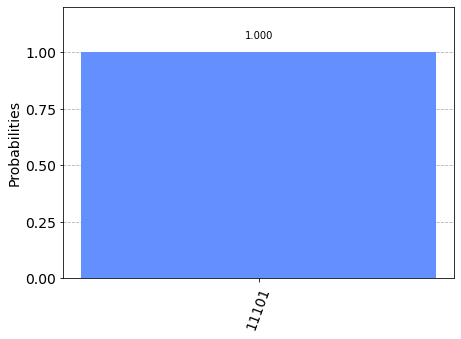

In [21]:
qc_sim = Aer.get_backend('aer_simulator')
counts = qc_sim.run(assemble(qc)).result().get_counts()
plot_histogram(counts)